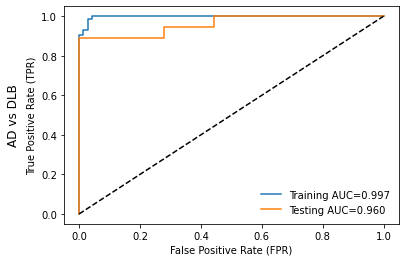

train [0.         0.         0.         0.01388889 0.01388889 0.02777778
 0.02777778 0.04166667 0.04166667 1.        ] [0.         0.01388889 0.90277778 0.90277778 0.93055556 0.93055556
 0.98611111 0.98611111 1.         1.        ] 0.9974922839506173
test [0.         0.         0.         0.27777778 0.27777778 0.44444444
 0.44444444 1.        ] [0.         0.05555556 0.88888889 0.88888889 0.94444444 0.94444444
 1.         1.        ] 0.9598765432098765


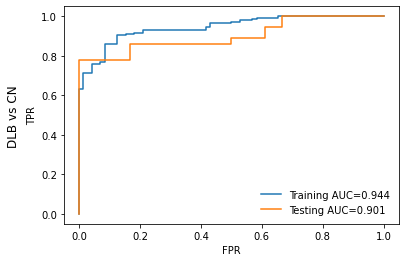

train [0.         0.         0.         0.01388889 0.01388889 0.04166667
 0.04166667 0.06944444 0.06944444 0.08333333 0.08333333 0.125
 0.125      0.15277778 0.15277778 0.18055556 0.18055556 0.20833333
 0.20833333 0.41666667 0.41666667 0.43055556 0.43055556 0.5
 0.5        0.52777778 0.52777778 0.56944444 0.56944444 0.58333333
 0.58333333 0.65277778 0.65277778 1.        ] [0.         0.00694444 0.63194444 0.63194444 0.71527778 0.71527778
 0.75694444 0.75694444 0.77083333 0.77083333 0.86111111 0.86111111
 0.90277778 0.90277778 0.90972222 0.90972222 0.91666667 0.91666667
 0.93055556 0.93055556 0.94444444 0.94444444 0.96527778 0.96527778
 0.97222222 0.97222222 0.97916667 0.97916667 0.98611111 0.98611111
 0.99305556 0.99305556 1.         1.        ] 0.9437692901234568
test [0.         0.         0.         0.16666667 0.16666667 0.5
 0.5        0.61111111 0.61111111 0.66666667 0.66666667 1.        ] [0.         0.02777778 0.77777778 0.77777778 0.86111111 0.86111111
 0.88888889 0.88888889 0.

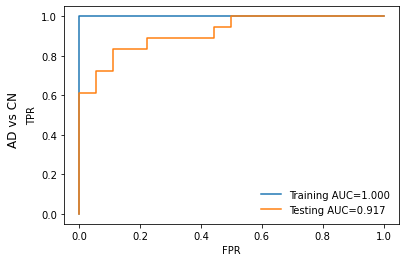

train [0. 0. 0. 1.] [0.         0.02777778 1.         1.        ] 1.0
test [0.         0.         0.         0.05555556 0.05555556 0.11111111
 0.11111111 0.22222222 0.22222222 0.44444444 0.44444444 0.5
 0.5        1.        ] [0.         0.11111111 0.61111111 0.61111111 0.72222222 0.72222222
 0.83333333 0.83333333 0.88888889 0.88888889 0.94444444 0.94444444
 1.         1.        ] 0.9166666666666666


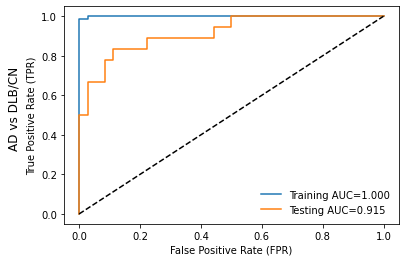

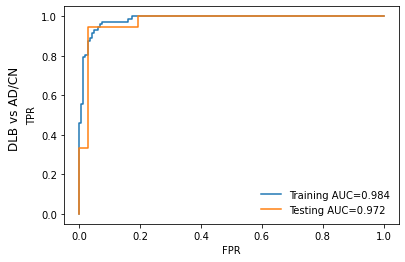

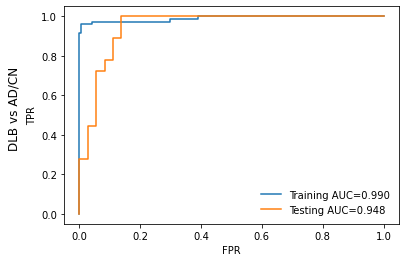

In [287]:
import pickle
import logging
import pathlib
from abc import ABC, abstractmethod
import pandas as pd
import os
import openpyxl
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from aidp.data.groupings import AdVsDlbGrouping, AdVsAllGrouping, DlbVsAllGrouping, ConVsAllGrouping, AdVsConGrouping, DlbVsConGrouping

#Version control
skvers = sklearn.__version__
#NEED to use the same ML conda version (scikit0learn==0.19.0)
if skvers != "0.21.3" :
    !pip install scikit-learn==0.19.0
    import sklearn

#Paths
mk="ADDLB-1019d"
script_path="/media/mcuser/Data1/RChen/ML_code"
mod_path=script_path+'/resources/models/'+mk+'/dmri'
xl_path='/media/mcuser/Data1/RChen/ML_code/'
os.chdir(mod_path)
os.getcwd()

#Load dataframes
df_tr=pd.read_excel(xl_path+'/ADDLB_train_1019d.xlsx', header=0, index_col="Subject")
df_te=pd.read_excel(xl_path+'/ADDLB_test_1019d.xlsx', header=0, index_col="Subject")
dftrY=df_tr[["GroupID"]]
dfteY=df_te[["GroupID"]]
dftrX=df_tr.drop(["Site", "GroupID"], axis=1)
dfteX=df_te.drop(["Site", "GroupID"], axis=1)

#Load models
advdlb=pickle.load(open('ad_v_dlb.pkl', 'rb'))
dlbvcon=pickle.load(open('dlb_v_con.pkl', 'rb'))
advcon=pickle.load(open('ad_v_con.pkl', 'rb'))
advall=pickle.load(open('ad_v_all.pkl', 'rb'))
dlbvall=pickle.load(open('dlb_v_all.pkl', 'rb'))
convall=pickle.load(open('con_v_dem.pkl', 'rb'))
grp_list = [ advdlb, dlbvcon, advcon, advall, dlbvall, convall]

# Make  dictionaries for each, for df.replace
avd_dict = {"GroupID": {2:0}} #drop 3
dvc_dict = {"GroupID": {3:0, 2:1}} #drop 1
avc_dict = {"GroupID": {3:0}} #drop 2
avb_dict = {"GroupID": {2:0, 3:0}}
dvb_dict = {"GroupID": {1:"A", 3:"A", 2:"B"}}
cvb_dict = {"GroupID": {1:"A", 2:"A", 3:"B"}}
tf_dict = {"GroupID": {"B":1, "A":0}}
dict_list = [avd_dict, dvc_dict, avc_dict, avb_dict, dvb_dict, cvb_dict]


#AD_DLB
dxmodel = grp_list[0]
dftrYcr = dftrY.replace(dict_list[0])
dftrYcr1 = dftrYcr[dftrYcr.GroupID < 2]
dfteYcr = dfteY.replace(dict_list[0])
dfteYcr1 = dfteYcr[dfteYcr.GroupID < 2]
dftrX1 = dftrX[dftrX.index.isin(dftrYcr1.index)]
dfteX1 = dfteX[dfteX.index.isin(dfteYcr1.index)]
ypredtr = dxmodel.predict_proba(dftrX1)[::,1]
ypredte = dxmodel.predict_proba(dfteX1)[::,1]
fprtr, tprtr, _ = sklearn.metrics.roc_curve(dftrYcr1, ypredtr)
auc_tr = sklearn.metrics.roc_auc_score(dftrYcr1, ypredtr)
fprte, tprte, _ = sklearn.metrics.roc_curve(dfteYcr1, ypredte)
auc_te = sklearn.metrics.roc_auc_score(dfteYcr1, ypredte)
plt.plot(fprtr, tprtr, label="Training AUC=%0.3f" %auc_tr)
plt.plot(fprte, tprte, label="Testing AUC=%0.3f" %auc_te)
plt.plot([0,1], [0,1], 'k--')
plt.title('AD vs DLB', color='k', rotation='vertical', x=-.15, y=.345)
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.legend(loc=4)
plt.legend(frameon=False)
plt.savefig('/media/mcuser/Data1/RChen/ad_v_dlb.svg')
# plt.savefig('/media/mcuser/Data1/RChen/ad_v_dlb.png')
plt.show()
print("train", fprtr, tprtr, auc_tr)
print("test", fprte, tprte, auc_te)

#DLB_CON
dxmodel = grp_list[1]
dftrYcr = dftrY.replace(dict_list[1])
dftrYcr1 = dftrYcr[dftrYcr.GroupID < 2]
dfteYcr = dfteY.replace(dict_list[1])
dfteYcr1 = dfteYcr[dfteYcr.GroupID < 2]
dftrX1 = dftrX[dftrX.index.isin(dftrYcr1.index)]
dfteX1 = dfteX[dfteX.index.isin(dfteYcr1.index)]
ypredtr = dxmodel.predict_proba(dftrX1)[::,1]
ypredte = dxmodel.predict_proba(dfteX1)[::,1]
fprtr, tprtr, _ = sklearn.metrics.roc_curve(dftrYcr1, ypredtr)
auc_tr = sklearn.metrics.roc_auc_score(dftrYcr1, ypredtr)
fprte, tprte, _ = sklearn.metrics.roc_curve(dfteYcr1, ypredte)
auc_te = sklearn.metrics.roc_auc_score(dfteYcr1, ypredte)
plt.plot(fprtr, tprtr, label="Training AUC=%0.3f" %auc_tr)
plt.plot(fprte, tprte, label="Testing AUC=%0.3f" %auc_te)
# plt.plot([0,1], [0,1], 'k--')
plt.title('DLB vs CN', color='k', rotation='vertical', x=-.15, y=.34)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend(loc=4)
plt.legend(frameon=False)
plt.savefig('/media/mcuser/Data1/RChen/dlb_v_con.svg')
# plt.savefig('/media/mcuser/Data1/RChen/dlb_v_con.png')
plt.show()
print("train", fprtr, tprtr, auc_tr)
print("test", fprte, tprte, auc_te)

#AD_CON
dxmodel = grp_list[2]
dftrYcr = dftrY.replace(dict_list[2])
dftrYcr1 = dftrYcr[dftrYcr.GroupID < 2]
dfteYcr = dfteY.replace(dict_list[2])
dfteYcr1 = dfteYcr[dfteYcr.GroupID < 2]
dftrX1 = dftrX[dftrX.index.isin(dftrYcr1.index)]
dfteX1 = dfteX[dfteX.index.isin(dfteYcr1.index)]
ypredtr = dxmodel.predict_proba(dftrX1)[::,1]
ypredte = dxmodel.predict_proba(dfteX1)[::,1]
fprtr, tprtr, _ = sklearn.metrics.roc_curve(dftrYcr1, ypredtr)
auc_tr = sklearn.metrics.roc_auc_score(dftrYcr1, ypredtr)
fprte, tprte, _ = sklearn.metrics.roc_curve(dfteYcr1, ypredte)
auc_te = sklearn.metrics.roc_auc_score(dfteYcr1, ypredte)
plt.plot(fprtr, tprtr, label="Training AUC=%0.3f" %auc_tr)
plt.plot(fprte, tprte, label="Testing AUC=%0.3f" %auc_te)
plt.title('AD vs CN', color='k', rotation='vertical', x=-.15, y=.34)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend(loc=4)
plt.legend(frameon=False)
plt.savefig('/media/mcuser/Data1/RChen/ad_v_con.svg')
# plt.savefig('/media/mcuser/Data1/RChen/ad_v_con.png')
plt.show()
print("train", fprtr, tprtr, auc_tr)
print("test", fprte, tprte, auc_te)

#AD_BOTH
dxmodel = grp_list[3]
dftrYcr = dftrY.replace(dict_list[3])
dftrYcr1 = dftrYcr[dftrYcr.GroupID < 2]
dfteYcr = dfteY.replace(dict_list[3])
dfteYcr1 = dfteYcr[dfteYcr.GroupID < 2]
dftrX1 = dftrX[dftrX.index.isin(dftrYcr1.index)]
dfteX1 = dfteX[dfteX.index.isin(dfteYcr1.index)]
ypredtr = dxmodel.predict_proba(dftrX1)[::,1]
ypredte = dxmodel.predict_proba(dfteX1)[::,1]
fprtr, tprtr, _ = sklearn.metrics.roc_curve(dftrYcr1, ypredtr)
auc_tr = sklearn.metrics.roc_auc_score(dftrYcr1, ypredtr)
fprte, tprte, _ = sklearn.metrics.roc_curve(dfteYcr1, ypredte)
auc_te = sklearn.metrics.roc_auc_score(dfteYcr1, ypredte)
plt.plot(fprtr, tprtr, label="Training AUC=%0.3f" %auc_tr)
plt.plot(fprte, tprte, label="Testing AUC=%0.3f" %auc_te)
plt.plot([0,1], [0,1], 'k--')
plt.title('AD vs DLB/CN', color='k', rotation='vertical', x=-.15, y=.325)
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.legend(loc=4)
plt.legend(frameon=False)
plt.savefig('/media/mcuser/Data1/RChen/ad_v_b.svg')
# plt.savefig('/media/mcuser/Data1/RChen/ad_v_b.png')
plt.show()

# for i in range(0,4):
#     dxmodel = grp_list[i]
#     dftrYcr = dftrY.replace(dict_list[i])
#     dftrYcr1 = dftrYcr[dftrYcr.GroupID < 2]
#     dfteYcr = dfteY.replace(dict_list[i])
#     dfteYcr1 = dfteYcr[dfteYcr.GroupID < 2]
#     dftrX1 = dftrX[dftrX.index.isin(dftrYcr1.index)]
#     dfteX1 = dfteX[dfteX.index.isin(dfteYcr1.index)]
#     ypredtr = dxmodel.predict_proba(dftrX1)[::,1]
#     ypredte = dxmodel.predict_proba(dfteX1)[::,1]

#     # print(np.unique(dftrYcr1))
#     fprtr, tprtr, _ = sklearn.metrics.roc_curve(dftrYcr1, ypredtr)
#     auc_tr = sklearn.metrics.roc_auc_score(dftrYcr1, ypredtr)
#     fprte, tprte, _ = sklearn.metrics.roc_curve(dfteYcr1, ypredte)
#     auc_te = sklearn.metrics.roc_auc_score(dfteYcr1, ypredte)
    
#     plt.plot(fprtr, tprtr, label="Training AUC=%0.3f" %auc_tr)
#     plt.plot(fprte, tprte, label="Testing AUC=%0.3f" %auc_te)
#     plt.ylabel('TPR')
#     plt.xlabel('FPR')
#     plt.legend(loc=4)
#     plt.legend(frameon=False)
#     plt.show()

#for DLB_V_ALL
dxmodeld=pickle.load(open('dlb_v_all.pkl', 'rb')) #4
dftrYcr = dftrY.replace(dvb_dict)
dftrYcr1 = dftrYcr.replace(tf_dict)
dfteYcr = dfteY.replace(dvb_dict)
dfteYcr1 = dfteYcr.replace(tf_dict)
ypredtr = dxmodeld.predict_proba(dftrX)[::,1]
ypredte = dxmodeld.predict_proba(dfteX)[::,1]
fprtr1, tprtr1, _ = sklearn.metrics.roc_curve(dftrYcr1, ypredtr)
auc_tr1 = sklearn.metrics.roc_auc_score(dftrYcr1, ypredtr)
fprte1, tprte1, _ = sklearn.metrics.roc_curve(dfteYcr1, ypredte)
auc_te1 = sklearn.metrics.roc_auc_score(dfteYcr1, ypredte)

plt.plot(fprtr1, tprtr1, label="Training AUC=%0.3f" %auc_tr1)
plt.plot(fprte1, tprte1, label="Testing AUC=%0.3f" %auc_te1)
# plt.plot([0,1], [0,1], 'k--')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('DLB vs AD/CN', color='k', rotation='vertical', x=-.15, y=.325)
plt.legend(loc=4)
plt.legend(frameon=False)
plt.savefig('/media/mcuser/Data1/RChen/dlb_v_b.svg')
# plt.savefig('/media/mcuser/Data1/RChen/dlb_v_b.png')
plt.show()

#for CON_V_ALL
dxmodelc=pickle.load(open('con_v_dem.pkl', 'rb'))
dftrYcr = dftrY.replace(cvb_dict)
dftrYcr1 = dftrYcr.replace(tf_dict)
dfteYcr = dfteY.replace(cvb_dict)
dfteYcr1 = dfteYcr.replace(tf_dict)
ypredtr = dxmodelc.predict_proba(dftrX)[::,1]
# print(np.unique(ypredtr))
ypredte = dxmodelc.predict_proba(dfteX)[::,1]
fprtr, tprtr, _ = sklearn.metrics.roc_curve(dftrYcr1, ypredtr)
auc_tr = sklearn.metrics.roc_auc_score(dftrYcr1, ypredtr)
fprte, tprte, _ = sklearn.metrics.roc_curve(dfteYcr1, ypredte)
auc_te = sklearn.metrics.roc_auc_score(dfteYcr1, ypredte)

plt.plot(fprtr, tprtr, label="Training AUC=%0.3f" %auc_tr)
plt.plot(fprte, tprte, label="Testing AUC=%0.3f" %auc_te)
plt.title('DLB vs AD/CN', color='k', rotation='vertical', x=-.15, y=.325)
plt.ylabel('TPR')
plt.xlabel('FPR')
# plt.xticks([])
plt.legend(loc=4)
plt.legend(frameon=False)
plt.savefig('/media/mcuser/Data1/RChen/cn_v_b.svg')
# plt.savefig('/media/mcuser/Data1/RChen/cn_v_b.png')
plt.show()


In [245]:
collist=['122_Cerebellum_10_L_FW',
'122_Cerebellum_10_R_FW',
'122_Cerebellum_3_L_FW',
'122_Cerebellum_7b_L_FW',
'122_Cerebellum_7b_R_FW',
'122_Caudate_L_FW',
'122_Cerebellum_3_R_FW',
'122_Cerebellum_8_R_FW',
'122_Cerebellum_8_L_FW',
'122_Cerebellum_Crus1_R_FW',
'122_Cerebellum_Crus2_L_FW',
'122_Cerebellum_Crus2_R_FW',
'122_Occipital_Mid_L_FW',
'122_Occipital_Sup_L_FW',
'122_Pons_FW',
'122_Thalamus_L_FW',
'122_Thalamus_R_FW',
'122_Vermis_3_FW',
'122_Vermis_7_FW',
'122_Vermis_8_FW',
'122_Vermis_9_FW',
'Calcarine_Sulcus_Final_FW',
'Cerebello_thalamo_cortical_FW',
'CMB_LPI_FW',
'CMB_LS_WM_FW',	
'CMB_RAI_FW',
'CMB_RMS_FW',	
'CMB_RS_WM_FW',
'Corticostriatal_FW',
'CorVec_LA_FW',
'CorVec_LP_FW',
'CorVec_RA_FW',
'Cuneus_Final_FW',
'FA_CMB_MID_FW',
'FA_Front_L_FW',	
'FA_Front_R_FW',
'GP_FW',
'Inferior_Occipital_Final_FW',
'Left_ROI_v1_Z_17_20_FW',
'Lingual_Gyrus_Final_FW',
'Middle_Occipital_Final_FW',
'Motor_CC_Tracts_FW',
'new_mid_LL_FW',
'new_mid_RR_FW',	
'new_pSN_FW',
'Occipital_CC_Tracts_FW',
'PMd_Final_FW',
'PMv_Final_FW',
'pSN_FW',
'Right_cerebe_lobule4_5_FW',
'SCP_FW',
'STN_to_GP_FW',
'Superior_Occipital_Final_FW',
'Thalamus_FW',
'122_Caudate_L_FA',	
'122_Caudate_R_FA',
'122_Cerebellum_3_L_FA',	
'122_Cerebellum_3_R_FA',	
'122_Cerebellum_4_5_L_FA',	
'122_Cerebellum_4_5_R_FA',	
'122_Cerebellum_6_L_FA',	
'122_Cerebellum_6_R_FA',	
'122_Cerebellum_7b_L_FA',	
'122_Cerebellum_7b_R_FA',	
'122_Cerebellum_8_L_FA',	
'122_Cerebellum_8_R_FA',
'122_Cerebellum_Crus1_L_FA',	
'122_Cerebellum_Crus1_R_FA',	
'122_Cerebellum_Crus2_L_FA',	
'122_Cerebellum_Crus2_R_FA',
'122_Cingulum_Mid_L_FA',	
'122_Cingulum_Mid_R_FA',
'122_Dorsal_Mesopontine_FA',
'122_Pallidum_L_FA',	
'122_Pallidum_R_FA',
'122_Precentral_L_FA',	
'122_Precentral_R_FA',
'122_Precentral_L_FA',	
'122_Precentral_R_FA',
'122_Vermis_3_FA',	
'122_Vermis_4_5_FA',	
'122_Vermis_6_FA',	
'122_Vermis_7_FA',
'Association_Tracts_FA',
'Bilateral_Frontal_eyefield_FA',
'Bilateral_Thalamus_FA',
'Caudate_to_Middle_Frontal_FA',
'CC2_FA',
'Cerebellar_SCP_FA',
'CMB_LAI_FA',
'CMB_LAS_FA',	
'CMB_LIS_WM_FA',	
'CMB_LMS_FA',	
'CMB_LPI_FA',
'CMB_RAI_FA',	
'CMB_RAS_FA',
'CMB_RIS_WM_FA',	
'CMB_RMS_FA',	
'CMB_RPI_FA',
'Dentate_FA',
'FA_Front_L_FA',	
'FA_Front_R_FA',
'Inferior_Frontal_Gyrus_Pars_Opercularis_Final_FA',
'Inferior_Frontal_Gyrus_Pars_Triangularis_Final_FA',
'Inferior_Parietal_Lobule_Final_FA',
'LC2TECL_flip_s_2_FA',
'LC2TECL_FA',
'Left_4th_ventricle_FA',
'LobuleVI_FA',	
'LobuleV_FA',
'Middle_Frontal_Gyrus_Final_FA',
'Motor_CC_Tracts_FA',
'new_mid_RR_FA',	
'new_pSN_FA',
'Paracentral_Final_FA',	
'Parietal_CC_Tracts_FA',
'PPN_FA',
'preSMA_Final_FA',	
'Projection_Tracts_FA',
'Right_4th_ventricle_FA',	
'Right_cerebe_lobule4_5_FA',
'S1_Final_FA',	
'SCP_FA',
'SLF_TP_FA',	
'SMA_Final_FA',	
'STN_FA',
'Superior_Putamen_FA',
'Supramarginal_Gyrus_Final_FA',	
'Thalamus_FA',
'Vermis_FA']

In [259]:
nnn=10.242347
str(nnn).ljust(3,'0')

'10.242347'

,Sex,Age,122_Amygdala_L_FW,122_Amygdala_R_FW,122_Angular_L_FW,122_Angular_R_FW,122_Calcarine_L_FW,122_Calcarine_R_FW,122_Caudate_L_FW,122_Caudate_R_FW,...,STN_to_GP_FA,Superior_Frontal_Gyrus_Final_FA,Superior_Occipital_Final_FA,Superior_Parietal_Lobule_Final_FA,Superior_Putamen_FA,Superior_Temporal_Gyrus_Final_FA,Supramarginal_Gyrus_Final_FA,Thalamus_FA,UF_FA,Vermis_FA
Subject,,,,,,,,,,,,,,,,,,,,,
011_S_4105_10102017,2,77.0,0.196875,0.236533,0.236447,0.201153,0.354149,0.328397,0.187851,0.174422,...,0.556904,0.500672,0.642488,0.606083,0.330659,0.618685,0.558417,0.377937,0.392656,0.278625
320010-01_10052021,1,73.0,0.182593,0.306738,0.316584,0.282479,0.471192,0.416266,0.186763,0.241349,...,0.532270,0.496984,0.590280,0.575283,0.372574,0.589093,0.544958,0.364649,0.415535,0.305643
035_S_6160_01052018,1,61.0,0.222384,0.240990,0.235796,0.205275,0.372497,0.324587,0.211375,0.178093,...,0.487409,0.472811,0.650113,0.616685,0.228384,0.572399,0.520134,0.335899,0.393049,0.241855
057_S_0934_08092018,2,82.0,0.222359,0.299726,0.310873,0.334039,0.409925,0.366238,0.187084,0.178640,...,0.583977,0.538966,0.702318,0.657925,0.292709,0.657313,0.597652,0.352643,0.460803,0.290323
mri6949,1,77.0,0.194992,0.283471,0.364750,0.337012,0.418028,0.390857,0.317441,0.315337,...,0.362056,0.370138,0.493847,0.486386,0.255999,0.415337,0.387302,0.282051,0.236648,0.198464
098_S_4050_05272011,1,77.0,0.201954,0.391559,0.291904,0.261113,0.418197,0.369534,0.163625,0.160457,...,0.542423,0.506682,0.658724,0.608792,0.285804,0.623671,0.547722,0.335135,0.451108,0.286863
mri144,1,81.0,0.258717,0.388330,0.340144,0.342715,0.433358,0.386762,0.207277,0.190685,...,0.543743,0.500821,0.705256,0.639269,0.294811,0.635831,0.544801,0.352915,0.428835,0.214098
mri1942,1,81.0,0.288278,0.354576,0.551828,0.479134,0.549677,0.470338,0.356478,0.336084,...,0.595842,0.481621,0.595406,0.579097,0.326736,0.592036,0.557506,0.394570,0.403877,0.269343
023_S_6547_08072018,2,67.0,0.180547,0.212562,0.336806,0.307166,0.421888,0.332489,0.196062,0.174624,...,0.505377,0.492588,0.631012,0.625906,0.319892,0.590583,0.556454,0.340965,0.376124,0.222361


,Sex,Age,122_Amygdala_L_FW,122_Amygdala_R_FW,122_Angular_L_FW,122_Angular_R_FW,122_Calcarine_L_FW,122_Calcarine_R_FW,122_Caudate_R_FW,122_Cerebellum_4_5_L_FW,...,Putamen_FA,Right_ROI_v1_Z_17_20_FA,RN_FA,SLF_FA,STN_to_GP_FA,Superior_Frontal_Gyrus_Final_FA,Superior_Occipital_Final_FA,Superior_Parietal_Lobule_Final_FA,Superior_Temporal_Gyrus_Final_FA,UF_FA
Subject,,,,,,,,,,,,,,,,,,,,,
011_S_4105_10102017,2,77.0,0.196875,0.236533,0.236447,0.201153,0.354149,0.328397,0.174422,0.199433,...,0.164931,0.619439,0.529702,0.377955,0.556904,0.500672,0.642488,0.606083,0.618685,0.392656
320010-01_10052021,1,73.0,0.182593,0.306738,0.316584,0.282479,0.471192,0.416266,0.241349,0.202052,...,0.181019,0.662591,0.573147,0.381469,0.532270,0.496984,0.590280,0.575283,0.589093,0.415535
035_S_6160_01052018,1,61.0,0.222384,0.240990,0.235796,0.205275,0.372497,0.324587,0.178093,0.212255,...,0.143399,0.549706,0.469521,0.343523,0.487409,0.472811,0.650113,0.616685,0.572399,0.393049
057_S_0934_08092018,2,82.0,0.222359,0.299726,0.310873,0.334039,0.409925,0.366238,0.178640,0.188602,...,0.156690,0.678349,0.576187,0.446874,0.583977,0.538966,0.702318,0.657925,0.657313,0.460803
mri6949,1,77.0,0.194992,0.283471,0.364750,0.337012,0.418028,0.390857,0.315337,0.339633,...,0.128719,0.464533,0.437438,0.264012,0.362056,0.370138,0.493847,0.486386,0.415337,0.236648
098_S_4050_05272011,1,77.0,0.201954,0.391559,0.291904,0.261113,0.418197,0.369534,0.160457,0.223179,...,0.190749,0.709463,0.551589,0.396256,0.542423,0.506682,0.658724,0.608792,0.623671,0.451108
mri144,1,81.0,0.258717,0.388330,0.340144,0.342715,0.433358,0.386762,0.190685,0.213587,...,0.200375,0.676680,0.509448,0.385386,0.543743,0.500821,0.705256,0.639269,0.635831,0.428835
mri1942,1,81.0,0.288278,0.354576,0.551828,0.479134,0.549677,0.470338,0.336084,0.230658,...,0.180878,0.665566,0.579988,0.382832,0.595842,0.481621,0.595406,0.579097,0.592036,0.403877
023_S_6547_08072018,2,67.0,0.180547,0.212562,0.336806,0.307166,0.421888,0.332489,0.174624,0.285565,...,0.159607,0.669558,0.551236,0.397246,0.505377,0.492588,0.631012,0.625906,0.590583,0.376124


,GroupID
Subject,
011_S_4105_10102017,0
320010-01_10052021,1
035_S_6160_01052018,0
057_S_0934_08092018,0
mri6949,0
098_S_4050_05272011,0
mri144,0
mri1942,0
023_S_6547_08072018,0


[0.0012582  0.00204578 0.00208507 0.0021967  0.00229599 0.00274123
 0.00379339 0.00410066 0.00620041 0.00744156 0.0077466  0.00780514
 0.00824795 0.00917969 0.00950821 0.0096212  0.01018004 0.01048503
 0.01090039 0.01137399 0.01203524 0.01233875 0.01256766 0.0128548
 0.01479235 0.01559261 0.01615606 0.01633132 0.01757298 0.01787523
 0.0180044  0.01808097 0.01826456 0.01849005 0.01955661 0.01984679
 0.02040101 0.0217527  0.02178616 0.02292271 0.02324159 0.02346769
 0.02402016 0.0241137  0.02480067 0.02488841 0.02527173 0.02613304
 0.02726054 0.02785703 0.02788367 0.02892826 0.02921952 0.02961033
 0.0298908  0.03026587 0.0311513  0.03148654 0.03188373 0.03206866
 0.03261365 0.03311597 0.03395242 0.03437203 0.0376082  0.03806904
 0.03892912 0.03901006 0.03943634 0.04096628 0.0415895  0.04218593
 0.04425852 0.04475681 0.04612465 0.04837502 0.04934755 0.05216182
 0.05279921 0.0534336  0.05422594 0.05450083 0.05451673 0.05451746
 0.05451951 0.05452333 0.0545267  0.05453632 0.05454996 0.05455

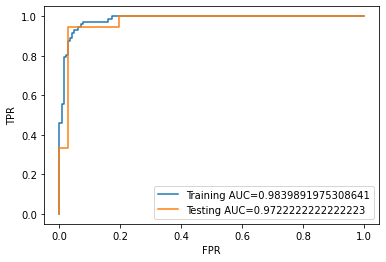

[0 1]
[[-5.06067421e-02 -3.00886713e+00]
 [-8.87098169e-01 -5.30771794e-01]
 [-6.14586231e-02 -2.81996306e+00]
 [-6.21971059e-03 -5.08314015e+00]
 [-5.87538815e-01 -8.11240115e-01]
 [-5.61427033e-02 -2.90779858e+00]
 [-9.22208596e-03 -4.69076152e+00]
 [-1.02322144e-02 -4.58732600e+00]
 [-8.22930855e-01 -5.78288778e-01]
 [-2.93549348e-02 -3.54293617e+00]
 [-2.19944915e-01 -1.62233576e+00]
 [-9.85153836e-01 -4.67417828e-01]
 [-1.19019663e+00 -3.62637614e-01]
 [-1.07413382e+00 -4.17932771e-01]
 [-8.74828689e-01 -5.39453929e-01]
 [-1.71367025e+00 -1.98698759e-01]
 [-5.60986480e-02 -2.90856177e+00]
 [-3.16468199e-02 -3.46889929e+00]
 [-1.24154997e-02 -4.39501094e+00]
 [-1.11185300e+00 -3.98909922e-01]
 [-1.77292144e-02 -4.04139298e+00]
 [-2.84566311e-01 -1.39570032e+00]
 [-1.84803276e-01 -1.77944243e+00]
 [-1.25787610e+00 -3.34434283e-01]
 [-5.60696329e-02 -2.90906474e+00]
 [-3.36927382e+00 -3.50207496e-02]
 [-2.31895179e-02 -3.77562727e+00]
 [-2.52033622e-02 -3.69335309e+00]
 [-5.57515807e

In [248]:
mk="ADDLB-1019d"
mod_path=script_path+'/resources/models/'+mk+'/dmri'
os.chdir(mod_path)

dxmodeld=pickle.load(open('dlb_v_all.pkl', 'rb'))
dftrYcr = dftrY.replace(dvb_dict)
dftrYcr1 = dftrYcr.replace(tf_dict)
dfteYcr = dfteY.replace(dvb_dict)
dfteYcr1 = dfteYcr.replace(tf_dict)
display(dftrX)
dftrX1 = dftrX.drop(collist,axis=1)
display(dftrX1)
display(dftrYcr1)
dfteX1 = dfteX.drop(collist,axis=1)
ypredtr = dxmodeld.predict_proba(dftrX1)[:,1]
print(np.unique(ypredtr))
ypredte = dxmodeld.predict_proba(dfteX1)[::,1]
fprtr1, tprtr1, _ = sklearn.metrics.roc_curve(dftrYcr1, ypredtr)
auc_tr1 = sklearn.metrics.roc_auc_score(dftrYcr1, ypredtr)
fprte1, tprte1, _ = sklearn.metrics.roc_curve(dfteYcr1, ypredte)
auc_te1 = sklearn.metrics.roc_auc_score(dfteYcr1, ypredte)

plt.plot(fprtr1, tprtr1, label="Training AUC="+str(auc_tr1))
plt.plot(fprte1, tprte1, label="Testing AUC="+str(auc_te1))
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend(loc=4)
plt.show()

print(dxmodeld.classes_)
dxmodeld
prpppp = dxmodeld.predict(dftrX1)
print(dxmodeld.predict_log_proba(dftrX1))
print(prpppp)
print(sklearn.metrics.classification_report(prpppp,dftrYcr1))

In [223]:
# dvb_dict = {"GroupID": {1:0, 3:0 }}
# tf_dict = {"GroupID": {2:1}}
# dxmodeld=pickle.load(open('dlb_v_all.pkl', 'rb'))
# dftrYcr = dftrY.replace(dvb_dict)
# dftrYcr1 = dftrYcr.replace(tf_dict)
# dftrYcr2 = dftrYcr1.GroupID.ravel()
# display(dftrYcr2)
# print(np.unique(dftrYcr2))
# display(dftrX)
# ypredtr = dxmodeld.predict_log_proba(dftrX)

# display(ypredtr[::,1])
# # sklearn.metrics.accuracy_score(dftrYcr2,ypredtr[::,1])
# # print(ypredtr)
# print(np.unique(ypredtr))
# fpr,tpr,_ = sklearn.metrics.roc_curve(ypredtr[::,1],dftrYcr2)

# display(dftrY.head(), dftrYcr.head(), dftrYcr1.head())
# print(np.unique(dftrY))
# print(np.unique(dftrYcr1))
# dfteYcr = dfteY.replace(dvb_dict)
# dfteYcr1 = dfteYcr.replace(tf_dict)
# print(np.unique(dfteYcr1))
# ypredtr = dxmodeld.predict_proba(dftrX)[::,1]
# print(np.unique(dxmodeld.predict_proba(dftrX)))
# ypredte = dxmodeld.predict_proba(dfteX)[::,1]
# fprtr1, tprtr1, _ = sklearn.metrics.roc_curve(dftrYcr1.GroupID, ypredtr)
# print(fprtr1, tprtr1)
# auc_tr1 = sklearn.metrics.roc_auc_score(dftrYcr1, ypredtr)
# fprte1, tprte1, _ = sklearn.metrics.roc_curve(dfteYcr1, ypredte)
# auc_te1 = sklearn.metrics.roc_auc_score(dfteYcr1, ypredte)

# plt.plot(fprtr1, tprtr1, label="Training AUC="+str(auc_tr1))
# plt.plot(fprte1, tprte1, label="Testing AUC="+str(auc_te1))
# plt.ylabel('TPR')
# plt.xlabel('FPR')
# plt.legend(loc=4)
# plt.show()

# yp=dxmodeld.predict_proba(dftrX)[::,1]
# f1,t1,_=sklearn.metrics.roc_curve(dftrYcr1, yp)
# print(dftrYcr1.GroupID, yp)
# plt.plot(f1,t1)
# plt.show()

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

[0 1]


,Sex,Age,122_Amygdala_L_FW,122_Amygdala_R_FW,122_Angular_L_FW,122_Angular_R_FW,122_Calcarine_L_FW,122_Calcarine_R_FW,122_Caudate_L_FW,122_Caudate_R_FW,...,STN_to_GP_FA,Superior_Frontal_Gyrus_Final_FA,Superior_Occipital_Final_FA,Superior_Parietal_Lobule_Final_FA,Superior_Putamen_FA,Superior_Temporal_Gyrus_Final_FA,Supramarginal_Gyrus_Final_FA,Thalamus_FA,UF_FA,Vermis_FA
Subject,,,,,,,,,,,,,,,,,,,,,
011_S_4105_10102017,2,77.0,0.196875,0.236533,0.236447,0.201153,0.354149,0.328397,0.187851,0.174422,...,0.556904,0.500672,0.642488,0.606083,0.330659,0.618685,0.558417,0.377937,0.392656,0.278625
320010-01_10052021,1,73.0,0.182593,0.306738,0.316584,0.282479,0.471192,0.416266,0.186763,0.241349,...,0.532270,0.496984,0.590280,0.575283,0.372574,0.589093,0.544958,0.364649,0.415535,0.305643
035_S_6160_01052018,1,61.0,0.222384,0.240990,0.235796,0.205275,0.372497,0.324587,0.211375,0.178093,...,0.487409,0.472811,0.650113,0.616685,0.228384,0.572399,0.520134,0.335899,0.393049,0.241855
057_S_0934_08092018,2,82.0,0.222359,0.299726,0.310873,0.334039,0.409925,0.366238,0.187084,0.178640,...,0.583977,0.538966,0.702318,0.657925,0.292709,0.657313,0.597652,0.352643,0.460803,0.290323
mri6949,1,77.0,0.194992,0.283471,0.364750,0.337012,0.418028,0.390857,0.317441,0.315337,...,0.362056,0.370138,0.493847,0.486386,0.255999,0.415337,0.387302,0.282051,0.236648,0.198464
098_S_4050_05272011,1,77.0,0.201954,0.391559,0.291904,0.261113,0.418197,0.369534,0.163625,0.160457,...,0.542423,0.506682,0.658724,0.608792,0.285804,0.623671,0.547722,0.335135,0.451108,0.286863
mri144,1,81.0,0.258717,0.388330,0.340144,0.342715,0.433358,0.386762,0.207277,0.190685,...,0.543743,0.500821,0.705256,0.639269,0.294811,0.635831,0.544801,0.352915,0.428835,0.214098
mri1942,1,81.0,0.288278,0.354576,0.551828,0.479134,0.549677,0.470338,0.356478,0.336084,...,0.595842,0.481621,0.595406,0.579097,0.326736,0.592036,0.557506,0.394570,0.403877,0.269343
023_S_6547_08072018,2,67.0,0.180547,0.212562,0.336806,0.307166,0.421888,0.332489,0.196062,0.174624,...,0.505377,0.492588,0.631012,0.625906,0.319892,0.590583,0.556454,0.340965,0.376124,0.222361


array([-16.11809555, -16.11809555, -16.11809555, -16.11809555,
       -16.11809555, -16.11809555, -16.11809555, -16.11809555,
       -16.11809555, -16.11809555, -16.11809555, -16.11809555,
       -16.11809555, -16.11809555, -16.11809555, -16.11809555,
       -16.11809555, -16.11809555, -16.11809555, -16.11809555,
       -16.11809555, -16.11809555, -16.11809555, -16.11809555,
       -16.11809555, -16.11809555, -16.11809555, -16.11809555,
       -16.11809555, -16.11809555, -16.11809555, -16.11809555,
       -16.11809555, -16.11809555, -16.11809555, -16.11809555,
       -16.11809555, -16.11809555, -16.11809555, -16.11809555,
       -16.11809555, -16.11809555, -16.11809555, -16.11809555,
       -16.11809555, -16.11809555, -16.11809555, -16.11809555,
       -16.11809555, -16.11809555, -16.11809555, -16.11809555,
       -16.11809555, -16.11809555, -16.11809555, -16.11809555,
       -16.11809555, -16.11809555, -16.11809555, -16.11809555,
       -16.11809555, -16.11809555, -16.11809555, -16.11

[-1.61180956e+01 -1.00000015e-07]


ValueError: continuous format is not supported

In [102]:
grp_list = [ advdlb, dlbvcon, advcon, advall, dlbvall, convall]
print(grp_list[1])

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('Scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('classifier',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight='balanced', coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='linear', max_iter=-1,
                                            probability=True, random_state=No...
             param_grid=({'classifier__C': array([1.00000000e-05, 2.33572147e-05, 5.45559478e-05, 1.27427499e-04,
       2.97635144e-0

In [20]:
model1 = pickle.load(open('ad_v_con.pkl', 'rb'))

In [27]:
model1.cv_results_

{'mean_fit_time': array([0.04047747, 0.03876657, 0.04027596, 0.03671517, 0.03530922,
        0.02942924, 0.02890048, 0.02357454, 0.02642612, 0.02773962,
        0.02707286, 0.02486105, 0.0281661 , 0.02669125, 0.02638097,
        0.02666969, 0.0268961 , 0.02548532, 0.02578621, 0.0239531 ]),
 'std_fit_time': array([0.00132183, 0.00077723, 0.00089264, 0.00118544, 0.00203194,
        0.00179991, 0.00236912, 0.00189984, 0.00167401, 0.00140584,
        0.00282581, 0.00291433, 0.0024067 , 0.00167604, 0.0017181 ,
        0.0019592 , 0.00184071, 0.00098714, 0.00069426, 0.00102527]),
 'mean_score_time': array([0.00554318, 0.00525422, 0.00563722, 0.00547132, 0.00485377,
        0.00442362, 0.00437069, 0.00349016, 0.00399899, 0.00330291,
        0.00350418, 0.00342927, 0.00392256, 0.00273814, 0.00382895,
        0.00313725, 0.00310063, 0.0034636 , 0.00279913, 0.00286145]),
 'std_score_time': array([0.00036484, 0.00010815, 0.00016894, 0.00041335, 0.00056093,
        0.00050516, 0.00046659, 0.000586

In [28]:
model1.estimator

Pipeline(memory=None,
         steps=[('Scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='linear', max_iter=-1,
                     probability=True, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [69]:
df1 = pd.read_excel(xl_path+'/ADDLB_train_1018.xlsx', header=0, index_col="Subject")
df1X= df1.drop(["Site", "GroupID"], axis=1) #HAVE TO REMOVE SITE
df1Y=df1[["GroupID"]]
df1Y=df1Y.replace({"GroupID": { 3:0, 2:0}})
# df1Y=df1Y
# display(df1X, df1Y)
# df1X.shape
print(df1Y.shape)
res = model1.score(df1X, df1Y)
print(res)

(216, 1)
0.3333333333333333


In [59]:
dpred = model1.predict(df1X)
print(dpred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [61]:
# display(df1X)

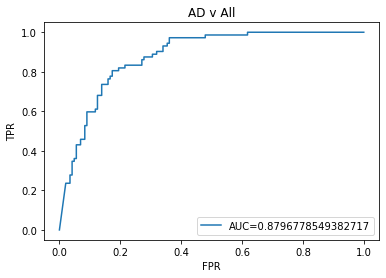

In [77]:
y_tr_pred1 = model1.predict_proba(df1X)[::,1]
fpr1, tpr1, _ = sklearn.metrics.roc_curve(df1Y, y_tr_pred1)
auc1 = sklearn.metrics.roc_auc_score(df1Y, y_tr_pred1)
plt.plot(fpr1, tpr1, label="AUC="+str(auc1))
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend(loc=4)
plt.title("AD v All")
plt.show()